<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [25]:
df = pd.read_csv('states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: **Math for 8 grade**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [26]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

Remove rows missing AVG_MATH_8_SCORE

In [27]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

Fill in missing estimates

In [28]:
((df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS)/df.ENROLL_ALL*100).describe()
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

0

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [29]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL'] 
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL'] 
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,TOTAL_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650,3.627221,2.025197
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312,5.050774,2.132082
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128,3.948044,2.184247
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537,5.164536,2.732512
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007,5.329154,2.680986


Final feature list: **SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT, TOTAL_EXPENDITURE_PER_STUDENT, INSTRUCTION_EXPENDITURE_PER_STUDENT, ENROLL_8, AVG_MATH_4_SCORE, TOTAL_REVENUE, YEAR**

Feature selection justification: **Since we're trying to analyze whether there is a correlation of school financial, enrollment, and achievement data on student performance levels, I thought expenditure per student and total revenue would be suitable proxy variables for school financial and avg math 4 score would be a good proxy for achievement data.  In addition, it would be interesting to see the changes in performance level over time, hence the feature year**

<h2> EDA </h2>

Visualization 1

Text(0, 0.5, '8th grade math score')

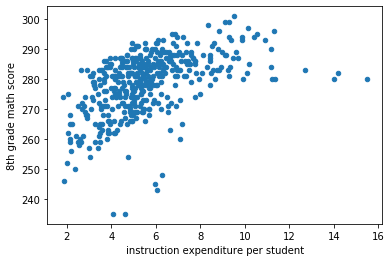

In [30]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('instruction expenditure per student')
plt.ylabel('8th grade math score')

**There seems to be a moderate, positive, linear(?) correlation between instruction expenditure per student and 8th grade math score, indicating as instruction expenditure per student increases, so does the student's math score.**

Visualization 2

Text(0, 0.5, '8th grade math score')

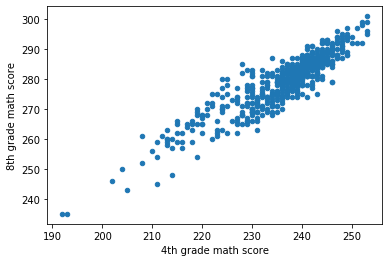

In [31]:
df.plot.scatter(x='AVG_MATH_4_SCORE',y='AVG_MATH_8_SCORE')
plt.xlabel('4th grade math score')
plt.ylabel('8th grade math score')

**There seems to be a strong, positive, linear correlation between 4th grade math score and 8th grade math score, indicating students who performed well on the 4th grade math exam also perform well on the 8th grade math exam. This gives rise to the question of whether an increase in expenditure is causing peformance levels to increase, or it's simply due to the student's natural ability at the subject**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df[['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', 'TOTAL_EXPENDITURE_PER_STUDENT', 'INSTRUCTION_EXPENDITURE_PER_STUDENT', 'ENROLL_8', 'AVG_MATH_4_SCORE', 'TOTAL_REVENUE', 'YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [35]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [36]:
# create your model here
model = LinearRegression()

In [37]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print intercept and coefficients of variables

In [40]:
print(model.intercept_)
print(model.coef_)

812.9255355959654
[ 4.09072870e-01 -2.97673622e-01  5.02513655e-01 -3.47030835e-06
  1.08591324e+00  2.70458007e-10 -3.94054404e-01]


R^2 value: linear model fits data relatively well

In [41]:
model.score(X_test, y_test)

0.8960385493743431

In [42]:
np.mean(model.predict(X_test)-y_test)

0.08135675295476506

In [43]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.7204226533636513

In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [46]:
y_pred = model.predict(X_test)

In [39]:
# for classification:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/home/izzylee/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

Text(0, 0.5, 'INSTRUCTION_EXPENDITURE_PER_STUDENT')

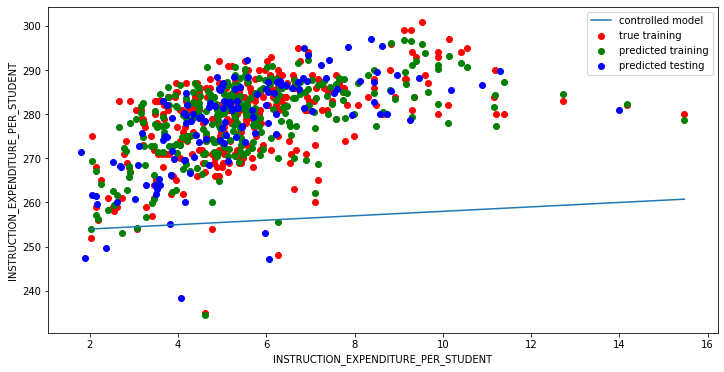

In [48]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('INSTRUCTION_EXPENDITURE_PER_STUDENT')

<h2> Summary </h2>

Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted
**As mentioned previously, I thought expenditures per student and total revenue would be suitable proxy variables for school financial and avg math 4 score would be a good proxy for achievement data.  In addition, I wanted to see the changes in performance level over time, hence the selected feature year. The regression of 8th grade math on all those factors resulted in an R^2 value of 0.896, implying the linear model fits the data relatively well. Thus, student performance can be predicted moderately well using these predictors and linear regression. However, the model could potentially be improved by using a model that involves exponential/logarithmic functions, as shown above with how instruction expenditure per student shows a slight curving pattern above the predicted values.**